# Exploratory Data Analysis for LIS 198A Basic Data Analytics

## Importing and Cleaning of Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format the y-axis to "millions"
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

# Function to format y-axis as percentages
def percentage_formatter(x, pos):
    return f'{x:.1f}%'

# Loading the CSV File
df = pd.read_csv('2023 dataset.csv')

# Rename columns
df.columns = ['Rank', 'Country', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Total', 'Share']

# Dropping 'Total' and 'Share' column
df = df.drop(columns=['Total','Share'])

# Convert numeric columns to proper data types
cols_to_numeric = df.columns[2:]  # Remaining columns after 'Rank' and 'Country'
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ""), errors='coerce')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     241 non-null    int64  
 1   Country  241 non-null    object 
 2   Jan      206 non-null    float64
 3   Feb      205 non-null    float64
 4   Mar      217 non-null    float64
 5   Apr      213 non-null    float64
 6   May      217 non-null    float64
 7   Jun      215 non-null    float64
 8   Jul      218 non-null    float64
 9   Aug      216 non-null    float64
 10  Sep      215 non-null    float64
 11  Oct      212 non-null    float64
 12  Nov      221 non-null    float64
 13  Dec      220 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 26.5+ KB
None

Summary Statistics:
             Rank            Jan            Feb            Mar           Apr  \
count  241.000000     206.000000     205.000000     217.000000    213.000000   
mean   111.904564    2

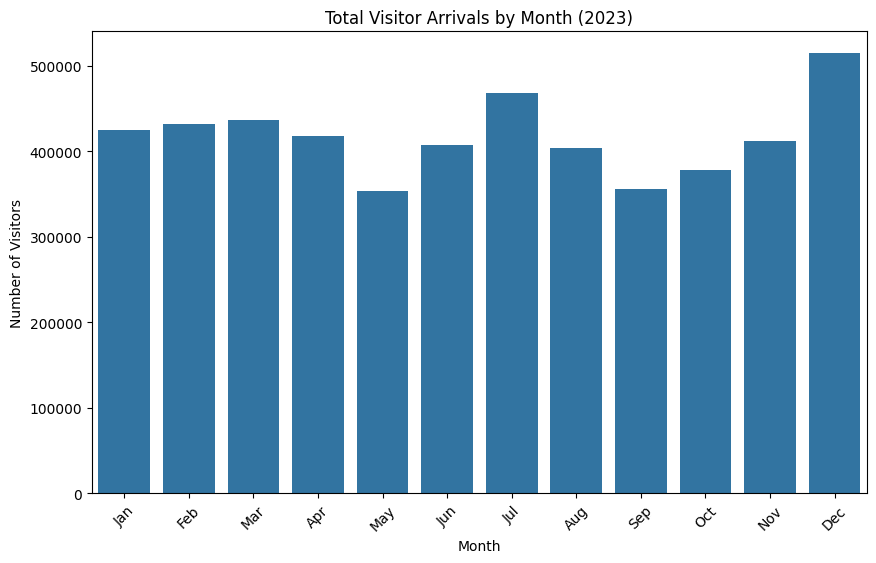

In [2]:
# Dataset information
print("\nDataset Info:")
print(df.info())

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Total visitor arrivals by month
monthly_totals = df[cols_to_numeric].sum()
print("\nTotal Arrivals by Month:")
print(monthly_totals)

# Visualize monthly totals
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_totals.index, y=monthly_totals.values)
plt.title('Total Visitor Arrivals by Month (2023)')
plt.ylabel('Number of Visitors')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


Top 5 Countries by Visitor Arrivals (Percentage of Total):
rSOUTH KOREA: 1,450,858.0 visitors (45.48%)
UNITED STATES OF AMERICA: 903,299.0 visitors (28.32%)
JAPAN: 305,580.0 visitors (9.58%)
AUSTRALIA: 266,551.0 visitors (8.36%)
CHINA: 263,836.0 visitors (8.27%)


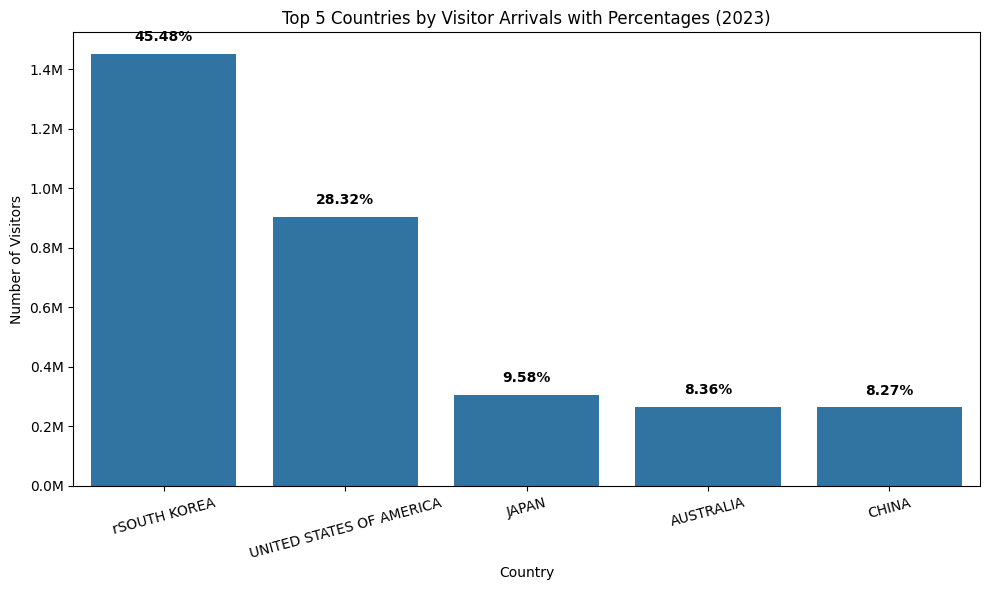

In [11]:
# Sum across all monthly columns to get a total for each country
df['Monthly_Total'] = df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].sum(axis=1)

# Sort by 'Monthly_Total' in descending order and select the top 5 countries
top5_countries = df.sort_values(by='Monthly_Total', ascending=False).head(5)

# Calculate the percentage share of each country's total
total_visitors = top5_countries['Monthly_Total'].sum()
top5_countries['Percentage'] = (top5_countries['Monthly_Total'] / total_visitors) * 100

# Print the top 5 countries with their percentages
print("\nTop 5 Countries by Visitor Arrivals (Percentage of Total):")
for index, row in top5_countries.iterrows():
    print(f"{row['Country']}: {row['Monthly_Total']:,} visitors ({row['Percentage']:.2f}%)")

# Plot the top 5 countries with visitor counts
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Monthly_Total', data=top5_countries)

# Add percentage annotations on top of the bars
for index, row in enumerate(top5_countries.itertuples()):
    plt.text(index, row.Monthly_Total + total_visitors * 0.01,  # Adjust position slightly above the bar
             f"{row.Percentage:.2f}%", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the chart
plt.title('Top 5 Countries by Visitor Arrivals with Percentages (2023)')
plt.xlabel('Country')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=15)  # Rotate x-axis labels for readability

# Format y-axis to display values in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Show the chart
plt.tight_layout()
plt.show()

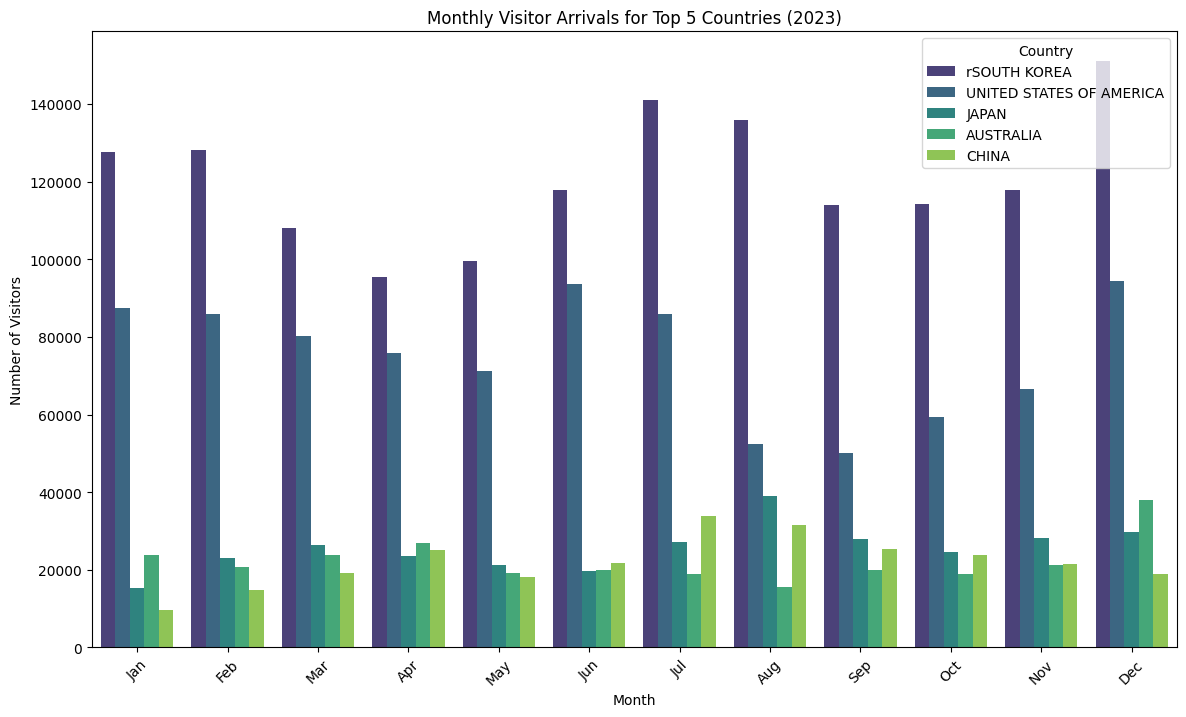

In [4]:
# Melt the DataFrame to long format (Country, Month, Visitor Count)
df_long = top5_countries.melt(id_vars='Country', 
                              value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                              var_name='Month', 
                              value_name='Visitor_Count')

# Plot the grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Month', y='Visitor_Count', hue='Country', data=df_long, palette='viridis')

# Customize the chart
plt.title('Monthly Visitor Arrivals for Top 5 Countries (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.legend(title='Country')
plt.xticks(rotation=45)  # Rotate x-axis for readability

# Show the chart
plt.show()